<a href="https://colab.research.google.com/github/ayanosk/dh_for_classes/blob/main/%E7%94%9F%E6%88%90AI%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%A6Python%E3%81%AE%E5%9F%BA%E7%A4%8E%E3%82%92%E5%AD%A6%E3%81%B5%E3%82%99%E3%81%9F%E3%82%81%E3%81%AE%E6%BC%94%E7%BF%922.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

本日の授業は、Python演習の2回目です。まず導入として、生成AIの便利さと難しさについて、改めて確認しておきましょう。

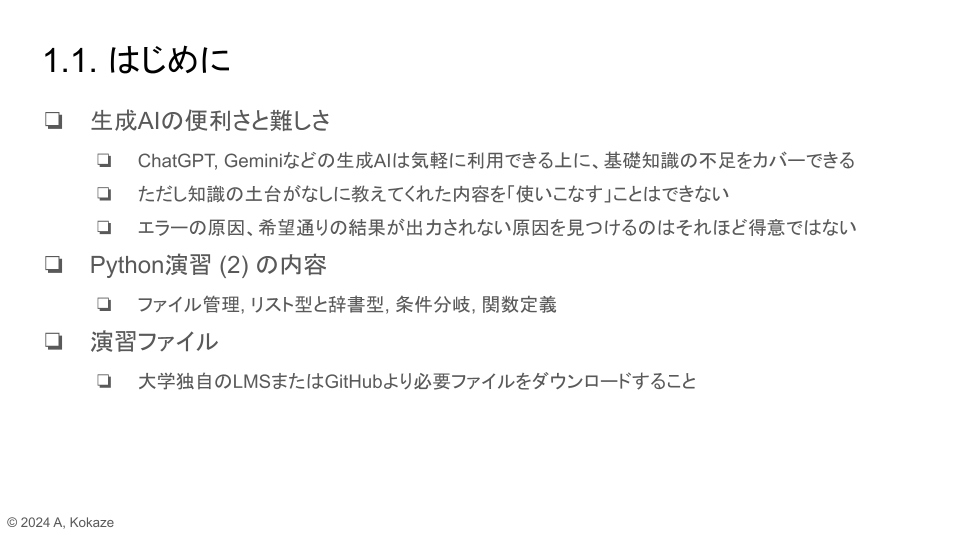

今回は2回目の演習になりますので、Pythonに興味を持った人に向けた情報もお知らせします。

授業を通して面白い、自分でも使ってみたいと感じた人は、以下の教材での学習を検討してみてください。

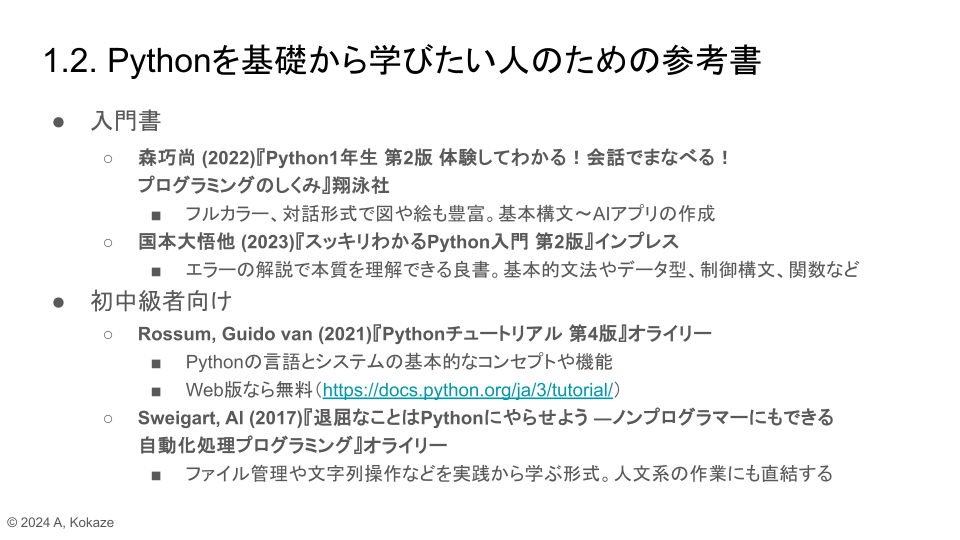

第2回では、ファイル管理や条件分岐など、少し実践的な内容に入っていきます。

難しいと感じたときにはブラウザで検索したり、GeminiやChatGPTに相談したりしながら進めてみましょう。

# 1. ファイル管理

Google Colabでは、Googleドライブにアップロードしたファイルを読み込んで処理したり、Googleドライブにファイルを書き出したりすることができます。ですが、そのためには「**マウント**」と呼ばれる作業が必要です。

今日の授業では実践的なファイルの読み書きを行いますので、Googleドライブをマウントしておきましょう。

## 【問題1-1】 Googleドライブをマウントしてください。

### 【解答】

In [3]:
# prompt: Googleドライブをマウントしてください。

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


実行すると、以下のようなアクセス許可画面が出てきます。ここで「**Googleドライブに接続**」をクリックしてご自身のGoogleアカウントを選択し、紐付けてください。

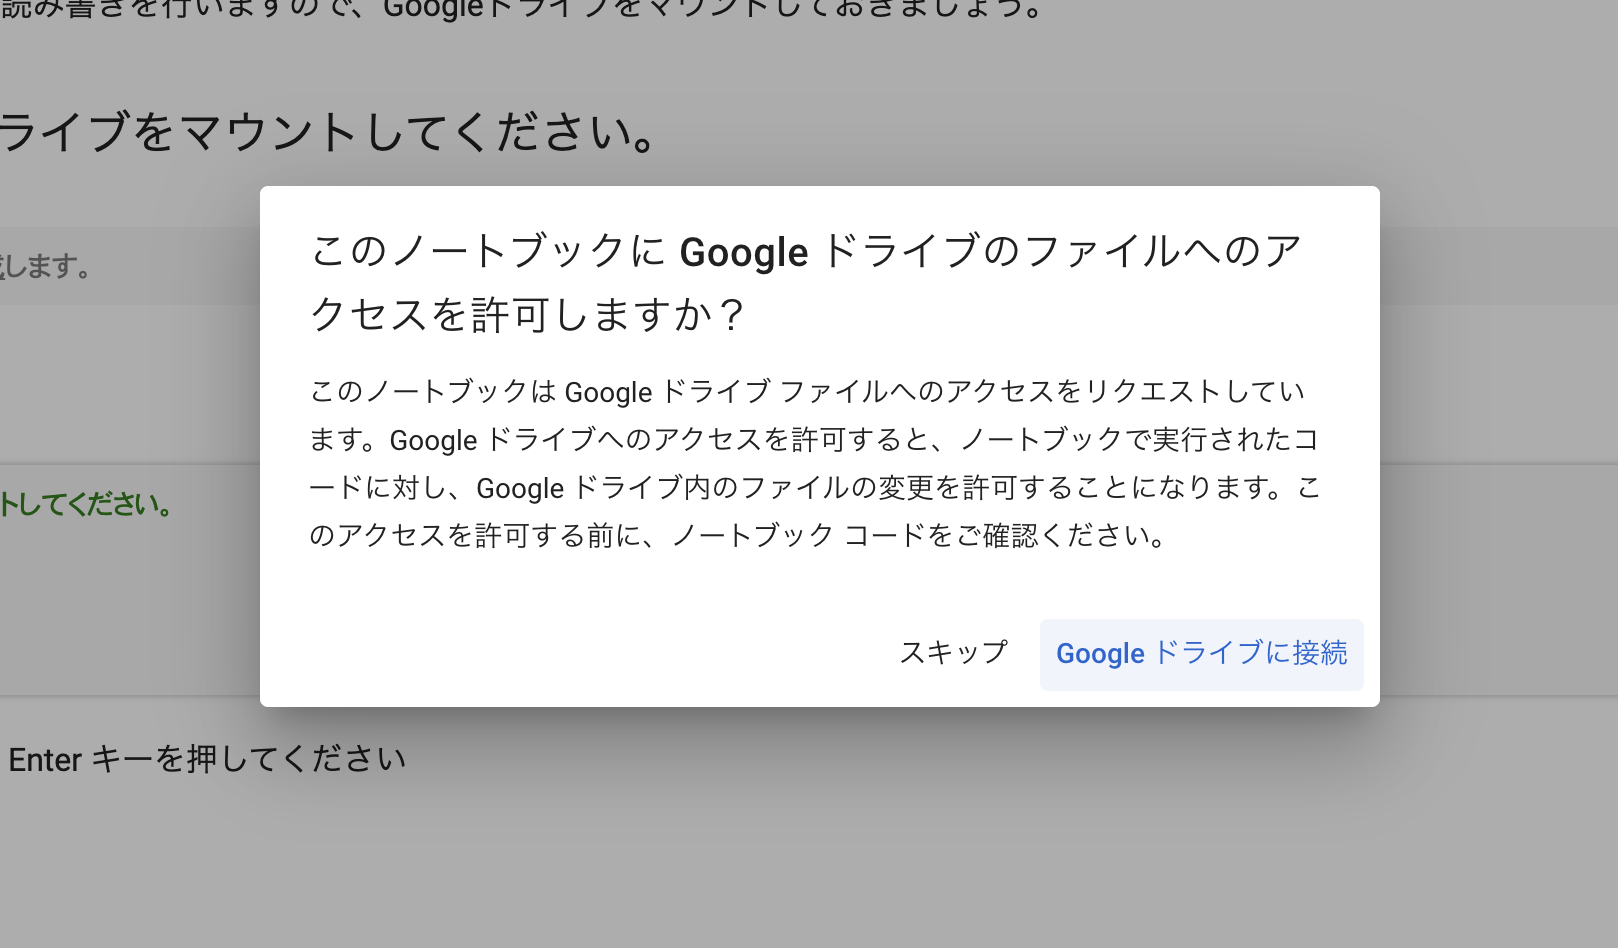

## 【次の問題への事前準備】

sampleForRead.csvファイルをWebClassからダウンロードし、Googleドライブの**「/content/drive/MyDrive/Colab Notebooks」**というフォルダ内に保存しましょう。

このフォルダの探し方は以下の画像を参考にしてください。

1. 【問題1-1】を解いて"Monted at /content/drive/"という表示が出たら、左側にあるフォルダのマーク（オレンジ色のアイコン）をクリックします。

2. そうすると、"drive"というフォルダが出てくるので、その左の矢印を押します。

  注）このとき"drive"が見えない人は上の開きかけのフォルダアイコン（".."）をクリックします。そうするとたくさんのフォルダが現れるので、"content"の三角矢印をクリックしてください。そこに"drive"フォルダがあるはずです。

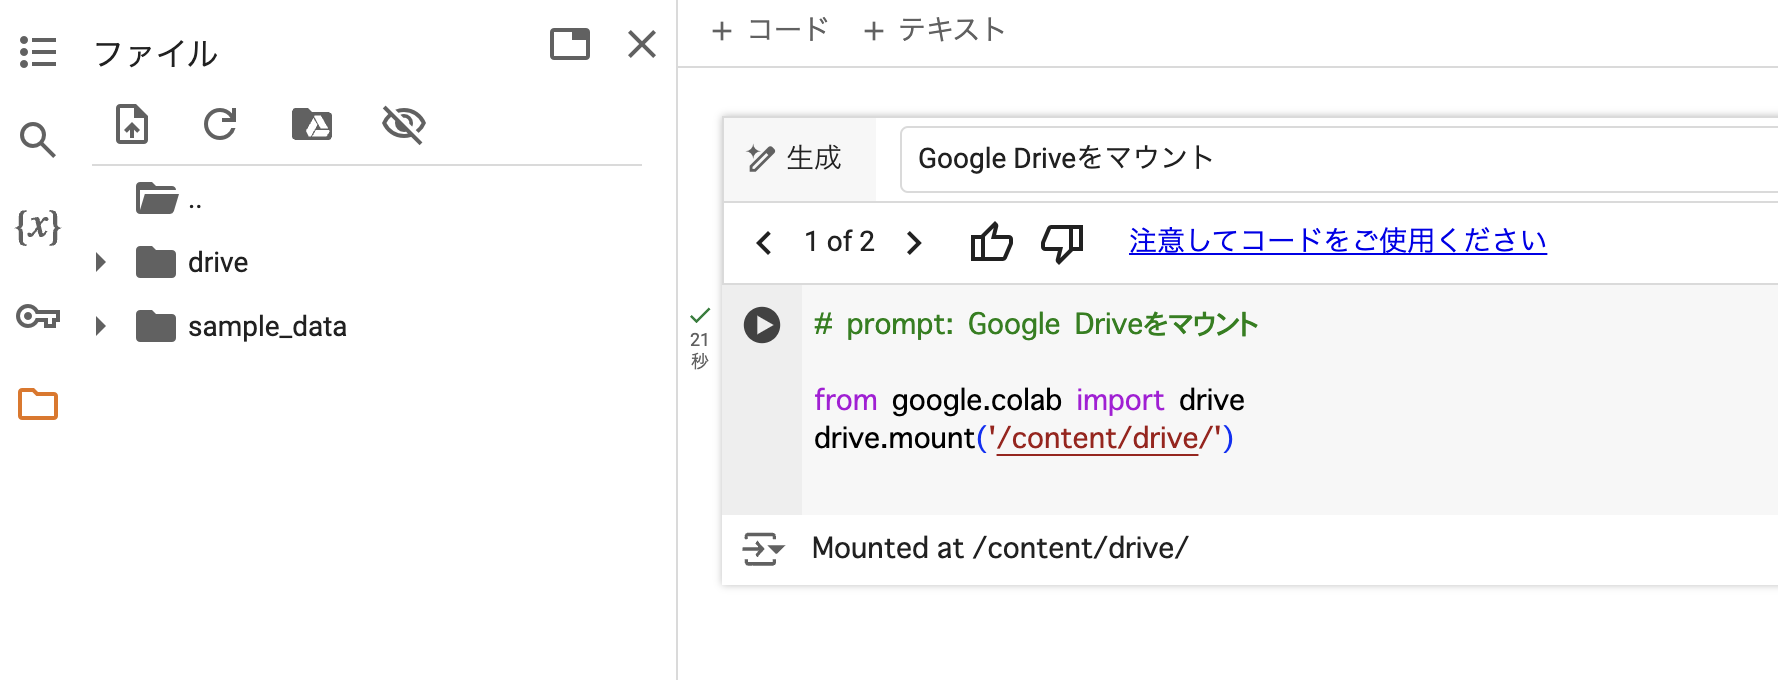

3. "drive" > "MyDrive" > "Colab Notebooks"の順に開いてください。

4. "Colab Notebooks"にカーソルを合わせると、右側に3点リーダーが現れます。これをクリックして、「アップロード」を選択してください。

5. "sampleForRead.csv"を選び、アップロードしましょう。このとき警告が出る場合がありますが、これはGoogle Colabで操作するファイルを別の場所にも保存しておいてね、というものですので、気にしなくて大丈夫です（みなさんはすでにPC上に保存しているはずです）。

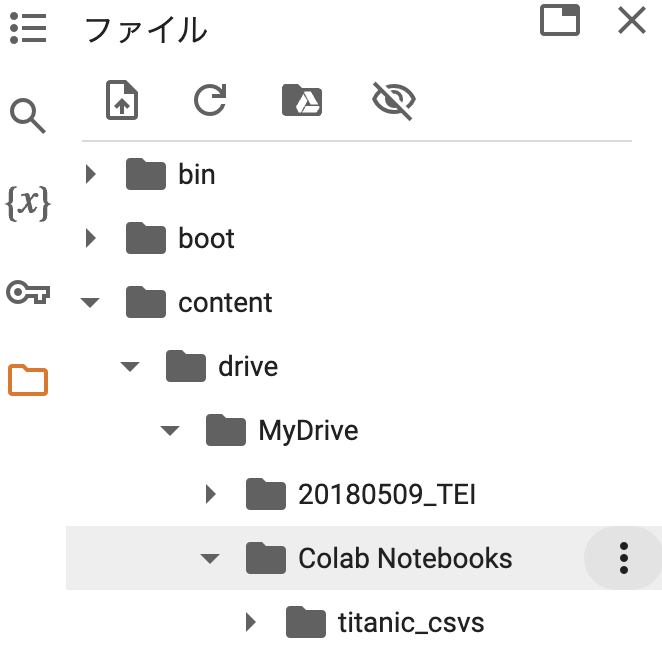

## 【問題1-2】 Googleドライブに保存されたsampleForRead.csvファイルを読み込み、その内容を表示してください。

### 【解答と解説】

In [4]:
import os

# 1. ファイルパスを指定してファイルを開く
file_path = '/content/drive/MyDrive/Colab Notebooks/sampleForRead.csv'

# 2. ファイルの内容を読み込み、表示
with open(file_path, 'r') as file:
    content = file.read()

print(content)

学部,学科
文学部,国文学科
文学部,英米文学科
文学部,地理学科
文学部,歴史学科
文学部,社会学科
文学部,心理学科
文学部,教育学科
経済学部,経済学科
経済学部,現代応用経済学科
経済学部,商学科
経済学部,経営学科
法学部,法律学科
法学部,政治学科
法学部,国際関係学科
経営学部,経営学科
経営学部,市場戦略学科
経営学部,企業会計学科
医療健康科学部,理学療法学科
医療健康科学部,作業療法学科
グローバル・メディア・スタディーズ学部,グローバル・メディア学科
総合教育部,総合教育学科



#### 1. 必要なライブラリをインポートする

```
import os
```


まず、Googleドライブをマウントするために必要なライブラリをインポートします。

osはファイルやディレクトリの操作を行うための標準ライブラリです。



##### 【補足】 ライブラリとは
**ライブラリ**とは、特定の機能や操作を簡単に実行できるようにまとめられたコードの集まりです。プログラミングでよく使われる便利な関数やクラスが含まれており、開発の効率を高めます。Pythonでは、import文を使ってライブラリを使用します。

#### 2. ファイルパスを指定してファイルを開く


```
file_path = '/content/drive/MyDrive/Colab Notebooks/sampleForRead.csv'
```


Googleドライブ内のファイルにアクセスするために、ファイルのパスを指定します。

もしここでエラーが出てしまう場合は、プログラムが辿るフォルダ名のどこかにスペルミスがある場合が多いので、ひとつずつチェックしてみてください。特に半角スペースと大文字・小文字の区別には要注意です。

##### 【補足】 パス（path）とは
**パス（path）**とは、ファイルやフォルダがコンピュータ内のどこにあるかを示す住所のようなものです。パスを使うことで、プログラムは特定のファイルやフォルダにアクセスできます。



#### 3. ファイルの内容を読み込み、表示する


```
with open(file_path, 'r') as file:
```

指定されたパスのファイルを読み込みモード（'r'）で開きます。読み取りモードとは、元のファイルに何も変更を加えず、データだけを取り出すモードです。このほかには、書き込みモード（'w'）と追記モード（'a'）があります。

管理したいデータに合わせてモードを選択します。

*   読み取りモード（'r'）：既存のファイルを開いて内容を読み取ることができますが、ファイルに対して書き込みを行うことはできません。
  * ファイルが存在しない場合、エラーが発生します。
  * ファイルの内容を読み取るだけで、変更は加えません。
*   書き込みモード（'w'）：既存の内容は全て削除され、新しい内容が書き込まれます。
  * ファイルが存在しない場合、新しいファイルが作成されます。
  * 既存のファイルが存在する場合、その内容は全て上書きされます。
*   追記モード（'a'）：既存の内容は保持され、新しいデータが追加されます。
  * ファイルが存在しない場合、新しいファイルが作成されます。
  * ファイルの既存の内容はそのまま残り、新しい内容が末尾に追加されます。

ファイルは"ファイル名を表す変数.open('ファイル名')"で開くことができますが、この書き方をすると、作業の最後に必ずファイル名を表す変数.close()を入れてファイルを閉じなければ開きっぱなしになってしまいます。

このときwithステートメントを使うことで、ファイルのクローズ処理を自動的に行います。できればwith openの形式を使った方が安全でしょう。

最後に、as file:の部分ですが、as fileは読み込んだファイルをfileという名前で呼ぶと定義しています。こうすることで、これから先のコードではfileと書いただけでsampleForRead.csvのファイルを読み込みモードで扱えるようになります。


```
content = file.read()
```
ここでは、contentという変数にfileの内容を格納しています。ファイル名.read()を使わなければ、fileの中身である文字列にはアクセスできません。


```
print(content)
```
最後に、contentという変数に入っているデータ（sampleForRead.csvの中身）を出力しています。






## 【問題1-3】 sampleForWrite.csvファイルを新規作成し、以下のデータを書き込みます。

書き込むデータには以下を使います。先に実行しておいてください。

In [6]:
data = [
    "学籍番号,氏名,生年月日,授業名,点数\n",
    "123456,山田太郎,2003-01-01,歴史学研究入門,55\n",
    "123456,山田太郎,2003-01-01,西洋史演習,73\n",
    "123456,山田太郎,2003-01-01,西洋史購読,88\n",
    "234567,鈴木花子,2002-02-02,歴史学研究入門,62\n",
    "234567,鈴木花子,2002-02-02,西洋史演習,44\n",
    "234567,鈴木花子,2002-02-02,西洋史購読,79\n",
    "345678,佐藤次郎,2001-03-03,歴史学研究入門,91\n",
    "345678,佐藤次郎,2001-03-03,西洋史演習,58\n",
    "345678,佐藤次郎,2001-03-03,西洋史購読,85\n",
    "456789,高橋裕子,2000-04-04,歴史学研究入門,70\n",
    "456789,高橋裕子,2000-04-04,西洋史演習,49\n",
    "456789,高橋裕子,2000-04-04,西洋史購読,80\n",
    "567890,伊藤直樹,2003-05-05,歴史学研究入門,77\n",
    "567890,伊藤直樹,2003-05-05,西洋史演習,95\n",
    "567890,伊藤直樹,2003-05-05,西洋史購読,66\n"
]

上のコードを実行したら、ファイルを作成し、書き込むコードを考えてみましょう。

### 【解答と解説】

In [7]:
# 1. ファイルパスを指定してファイルを新規作成
file_path = '/content/drive/MyDrive/Colab Notebooks/sampleForWrite.csv'

# 2. ファイルを開いてデータを書き込み、閉じる
with open(file_path, 'w') as file:
    file.writelines(data)

今度は書き込みモードで開くので、

```
with open(file_path, 'w') as file:
```

ここで'r'ではなく'w'になっていることに注意しましょう。もし同じ名前のファイルがあったとしても、'w'モードなのでファイル内の内容はすべてが書き換えられる形になります。



ご自身の出力結果を確かめるために、【問題1-2】と同じく読み取りモードで開いてみましょう。

In [8]:
# prompt: '/content/drive/MyDrive/Colab Notebooks/sampleForWrite.csv'を読み取りモードで開き、printする

with open('/content/drive/MyDrive/Colab Notebooks/sampleForWrite.csv', 'r') as file:
  content = file.read()
  print(content)

学籍番号,氏名,生年月日,授業名,点数
123456,山田太郎,2003-01-01,歴史学研究入門,55
123456,山田太郎,2003-01-01,西洋史演習,73
123456,山田太郎,2003-01-01,西洋史購読,88
234567,鈴木花子,2002-02-02,歴史学研究入門,62
234567,鈴木花子,2002-02-02,西洋史演習,44
234567,鈴木花子,2002-02-02,西洋史購読,79
345678,佐藤次郎,2001-03-03,歴史学研究入門,91
345678,佐藤次郎,2001-03-03,西洋史演習,58
345678,佐藤次郎,2001-03-03,西洋史購読,85
456789,高橋裕子,2000-04-04,歴史学研究入門,70
456789,高橋裕子,2000-04-04,西洋史演習,49
456789,高橋裕子,2000-04-04,西洋史購読,80
567890,伊藤直樹,2003-05-05,歴史学研究入門,77
567890,伊藤直樹,2003-05-05,西洋史演習,95
567890,伊藤直樹,2003-05-05,西洋史購読,66



# 2-1. リスト型と辞書型

人文学のデータを実際に扱っていくには、リスト型と辞書型のデータについて理解しておかなければなりません。少し難しいですが、簡単な練習問題で確認していきましょう。

## リスト型
リスト型は、複数の値を順序付きで格納できるデータ構造です。Pythonでは角括弧 [] を使って定義します。


* 順序がある（インデックス番号でアクセスできる）
* 同じリストに異なるデータ型の要素を含めることができる
* 変更可能（要素の追加、削除、変更ができる）

リスト型のデータは、例えば以下のようなものです。


In [ ]:
fruits = ['apple', 'banana', 'cherry']

## 辞書型
辞書型は、キーと値のペアを格納するデータ構造です。Pythonでは波括弧 {} を使って定義します。

* 順序がない（Python 3.7以降は挿入順を保持）
* キーは一意である必要がある（重複不可）
* 変更可能（キーと値の追加、削除、変更ができる）

辞書型のデータは、例えば以下のようなものです。


In [31]:
student = {'name': 'John', 'age': 20, 'major': 'Computer Science'}

それでは問題を通してリスト型と辞書型の操作感の違いについて学んでいきましょう。

## 【問題2-1-1】 colors という名前のリストを作成し、'red', 'green', 'blue'を追加してください。

### 解答と解説

In [9]:
# prompt: colors という名前のリストを作成し、'red', 'green', 'blue'を追加してください。

colors = []
colors.append('red')
colors.append('green')
colors.append('blue')

print(colors)


['red', 'green', 'blue']


In [ ]:
# 別解

colors = ['red', 'green', 'blue']
print(colors)

リストを作るには、角括弧を使います。変数名 = []とすると、その変数はリスト型だと指定できますので、あとは変数名.append()で要素を足していきます。

別解の方は、初めからリストの要素がわかっている場合に、直接入力しておく方法です。

次の問題に移る前に、必ず実行しておいてくださいね。

## 【問題2-1-2】 colorsにpurpleを足してください。

### 解答と解説

In [10]:
# prompt:  colorsにpurpleを足してください。

colors.append('purple')
print(colors)


['red', 'green', 'blue', 'purple']


リスト型では要素を足す際にappendを使います。これは問題2-1で解説している通りです。

## 【問題2-1-3】 colorsの最初の要素をprintしてください。

### 解答と解説

In [11]:
# prompt: colorsの最初の要素をprintしてください。

print(colors[0])


red


リスト型には順序があり、インデックス番号でアクセスできるという特徴がありました。この順番は０から始まる点に注意が必要です。インデックス番号で要素を指定するときには、**変数名[インデックス番号]**と書きます。

colorsの場合、最初の要素はredが表示されれば成功です。

## 【問題2-1-4】 colorsの最後の要素をprintしてください。

### 解答と解説

In [12]:
# prompt: colorsの最後の要素をprintしてください。

print(colors[3])

purple


In [36]:
# 別解
# prompt: colorsの最後の要素をprintしてください。

print(colors[-1])


purple


今度は最後の要素です。現在、colorsにはいくつの要素が入っているのでしょうか？

In [37]:
len(colors)

4

要素が4つということは、最後の要素のインデックス番号は3です。このとき、
```
print(colors[3])
```
でもいいのですが、要素の数が増えてくると指定が大変です。

後ろから指定する方法もあります。このとき、インデックス番号はマイナス方面に進んでいきます。


```
# 後ろから2番目
print(colors[-2])
```



## 【問題2-1-5】 book という名前の辞書を作成し、キーとして'title', 'author', 'year'、それぞれの値として'The Great Gatsby', 'F. Scott Fitzgerald', 1925を設定してください。

### 解答と解説

In [13]:
# prompt: book という名前の辞書を作成し、キーとして'title', 'author', 'year'、それぞれの値として'The Great Gatsby', 'F. Scott Fitzgerald', 1925を設定してください。

book = {
    'title': 'The Great Gatsby',
    'author': 'F. Scott Fitzgerald',
    'year': 1925
}


辞書は{}で定義します。空の辞書を用意したいなら、book = {}とすると良いでしょう。

辞書には見出しと説明がありますよね。これはPythonの辞書型でも同じで、見出しのことを「**キー（key）**」、説明のことを「**値（value）**」と呼びます。
この例だと、title, author, yearがキーで、コロンの右側に書いてあるものが値です。値のデータ型は自由です。今回だと、文字型と整数型の２種類があることがわかると思います。

辞書はキーで調べるので、リストのようなインデックス番号がありません。このことは注意が必要で、インデックス番号のような一意に決まる番号がないので、キーの重複はできません。**同じキー名を使うと値の中身が更新されてしまうので注意**してください。

## 【問題2-1-6】 辞書に新しいキー'genre'を追加し、値を'Fiction'に設定してください。

### 解答と解説

In [14]:
# prompt: 辞書に新しいキー'genre'を追加し、値を'Fiction'に設定してください。

book['genre'] = 'Fiction'

辞書に値を追加するときは、

```
辞書名[キー] = 値
```
という規則で入力します。


## 【問題2-1-7】 'year'の値を1926に変更して、bookの内容を表示してください。

### 解答と解説

In [15]:
# prompt: 'year'の値を1926に変更して、bookの内容を表示してください。

book['year'] = 1926

print(book)

{'title': 'The Great Gatsby', 'author': 'F. Scott Fitzgerald', 'year': 1926, 'genre': 'Fiction'}


yearの値が1925から1926に更新されたことがわかるでしょうか。
上で述べた通り、同じ名前のキーを併存させることはできないので、yearという同じキーを使った場合にはyearの値が更新されます。

## 【問題2-1-8】 'author'の値を表示してください。

### 解答と解説

In [16]:
# prompt: 'author'の値を表示してください。

print(book['author'])


F. Scott Fitzgerald


辞書の値を取り出すときには、**変数名[キー]**という書き方になります。

# 2-2. リスト型と辞書型の内包表記

リスト型と辞書型のデータは、お互いに内包表記で構造的に表現することができます。ウェブサイトから情報をとってくる、ダウンロードしたデータを扱うなどの際にはJSONという形式のデータを扱うことも多いですし、ご自身でツリー構造のデータを作りたくなるかもしれません。
そのときにこれらの内包表記は非常に重要ですので、いくつかの問題を通して練習してみましょう。

## 【問題2-2-1】 次のmatrixはリスト内リストです。2行目の3列目の値を取り出してください。

まずは下を実行し、matrixを読み込んでください。

In [17]:
matrix = [[1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]]

読み込んだら、実際に問題を解いてみましょう。

### 解答と解説

In [18]:
# prompt: matrixはリスト内リストです。2行目の3列目の値を取り出してください。

print(matrix[1][2])


6


リスト型では、まず大きな区分で何番目、その中のリストで何番目、という順番で指定していきます。
見やすくするためにmatrixは5行での表示になっていますが、実際にはこういうデータです。

```
matrix = [[1, 2, 3],[4, 5, 6],[7, 8, 9]]
```
これを元に考えていきましょう。
1.   2行目はつまり2番目のリストなので、インデックス番号は**1**です。
2.   3列目はつまり3番目の要素なので、インデックス番号は**2**です。
これを順番に並べるので、**matrix[1][2]**が答えになります。



## 【問題2-2-2】 次のgradesは辞書内辞書です。'Alice'の'Science'の成績を取り出してください。

まずは以下の辞書を実行して読み込んでおきましょう。

In [19]:
grades = {
    'Alice': {'Math': 90, 'Science': 85, 'History': 88},
    'Bob': {'Math': 70, 'Science': 80, 'History': 75},
    'Charlie': {'Math': 95, 'Science': 92, 'History': 89}
}

読み込んだら、実際に問題を解いてみましょう。

### 解答と解説

In [20]:
# prompt: gradesは辞書内辞書です。'Alice'の'Science'の成績を取り出してください。

print(grades['Alice']['Science'])


85


辞書ではキーを指定することで値が出力されるのでしたね。内包表記になっても同じです。


1.   gradesという辞書のキーは、'Alice', 'Bob', 'Charlie'の３つです。ここでは'Alice'をキーとして指定します。
2.   Aliceという辞書のキーは、'Math', 'Science', 'History'の３つです。ここでは'Science'をキーとして指定します。

これを組み合わせると**grades['Alice']['Science']**でAliceのScienceの成績を指定できます。



## 【問題2-2-3】 次のlibraryは辞書内リストです。'Author2'の2冊目の本のタイトルを取り出してください。

まずは以下の辞書を実行して読み込んでおきましょう。

In [21]:
library = {
    'Author1': [{'title': 'Book1', 'year': 2001}, {'title': 'Book2', 'year': 2002}],
    'Author2': [{'title': 'Book3', 'year': 2003}, {'title': 'Book4', 'year': 2004}],
    'Author3': [{'title': 'Book5', 'year': 2005}, {'title': 'Book6', 'year': 2006}]
}

読み込んだら、実際に問題を解いてみましょう。

### 解答と解説

In [22]:
# prompt: libraryは辞書内リストです。'Author2'の2冊目の本のタイトルを取り出してください。

print(library['Author2'][1]['title'])


Book4


In [47]:
# 別解

print(library['Author2'][-1]['title'])

Book4


順番に見ていきましょう。

1.   libraryは{}なので辞書型で、キーは'Author1', 'Author2', 'Author3'です。ここでは'Author2'を指定します。
2.   Author2の値は[]なのでリスト型です。2冊目なので、[1]または[-1]と指定します。
3.   Autho2[1]は{}なので辞書型で、キーは'title', 'year'です。ここでは'title'を指定します。

以上により、**library['Author2][1]['title']**が解答になります。



# 3. 条件分岐

もしAなら○を、そうでなければ□をしてください、というような処理が条件分岐です。リスト型と辞書型の構造を理解できていれば、第１章で作成したsampleForWrite.csvはもっと複雑な操作が可能です。まずは簡単な例で練習してみましょう。

## 【問題3-1】 入力された点数に応じて成績を判定するプログラムを作成してください。90点以上は「S」、80点以上90点未満は「A」、70点以上80点未満は「B」、60点以上70点未満は「C」、60点未満は「F」と表示してください。

### 解答と解説

In [23]:
# prompt: 入力された点数に応じて成績を判定するプログラムを作成してください。90点以上は「S」、80点以上90点未満は「A」、70点以上80点未満は「B」、60点以上70点未満は「C」、60点未満は「F」と表示してください。

score = int(input("点数を入力してください："))

if score >= 90:
  print("S")
elif score >= 80:
  print("A")
elif score >= 70:
  print("B")
elif score >= 60:
  print("C")
else:
  print("F")


点数を入力してください：68
C


条件文にはいくつかの方法がありますが、ここではif文について学習します。英語と同じく、「もし〜ならば…する、そうでなければ…する」という法則で書いていきますが、"elif"を使うことで条件をいくらでも足していくことができます。

また、今回の演習では扱いませんが、if文の中にif文を入れることもできます。



```
score = int(input("点数を入力してください："))
```
ここでは点数を入力するフォームを出現させ、そこに入力された数字をint()で整数型に変換したものをscoreにという変数に格納しています。


```
if score >= 90:
  print("S")
elif score >= 80:
  print("A")
elif score >= 70:
  print("B")
elif score >= 60:
  print("C")
else:
  print("F")
```
ここが実際のif文です。以下のような条件分岐をしています。

1. もしscoreの値が90以上なら"S"を出力する
2. 1ではないが、80以上（この時点で自動的に90未満という条件もつく）なら"A"を出力する
3. 1,2ではないが、70以上（この時点で自動的に80未満という条件もつく）なら"B"を出力する
4. 1,2,3ではないが、60以上（この時点で自動的に70未満という条件もつく）なら"C"を出力する
5. それ以外なら"F"を出力する
この例からもわかるように、ifから始まり、elseで終わることが大切です。







それでは、実践的で少し難しい問題にもチャレンジしてみましょう。

## 【問題3-2】 sampleForWrite.csvから山田太郎さんのデータを取り出して辞書化し、yamadaという変数のリストに入れてください。

### 解答と解説

In [24]:
# prompt: sampleForWrite.csvから山田太郎さんのデータを取り出して辞書化し、yamadaという変数のリストに入れてください。

import csv

# CSVファイルのパスを指定
csv_path = '/content/drive/MyDrive/Colab Notebooks/sampleForWrite.csv'

# CSVファイルを読み込み
with open(csv_path, 'r') as file:
    reader = csv.reader(file)

    # ヘッダー行の読み込み
    header = next(reader)

    # 山田太郎さんのデータを取り出す
    yamada = []
    for row in reader:
        if row[1] == '山田太郎':
            yamada_dict = {}
            for i in range(len(header)):
                yamada_dict[header[i]] = row[i]
            yamada.append(yamada_dict)

# yamadaを出力
print(yamada)


[{'学籍番号': '123456', '氏名': '山田太郎', '生年月日': '2003-01-01', '授業名': '歴史学研究入門', '点数': '55'}, {'学籍番号': '123456', '氏名': '山田太郎', '生年月日': '2003-01-01', '授業名': '西洋史演習', '点数': '73'}, {'学籍番号': '123456', '氏名': '山田太郎', '生年月日': '2003-01-01', '授業名': '西洋史購読', '点数': '88'}]




1. csvモジュールをインポートする


```
import csv
```
csvモジュールは、CSVファイルを読み書きするための標準ライブラリです。

2. CSVファイルのパスを指定する


```
csv_path = '/content/drive/MyDrive/Colab Notebooks/sampleForWrite.csv'

```
読み込みたいCSVファイルのパスを指定します。
3. CSVファイルを開く


```
with open(csv_path, 'r') as file:
    reader = csv.reader(file)
```
with open(csv_path, 'r') as fileは、指定されたパスのCSVファイルを読み込みモード('r')で開きます。

csv.reader(file)は、CSVファイルの内容を読み込むためのリーダーオブジェクトを作成します。

4. ヘッダー行を読み込む


```
header = next(reader)
```
next(reader)は、CSVファイルの最初の行（ヘッダー行）を読み込みます。ヘッダー行は、各列の名前が含まれています。

5. 山田さんのデータを入れておくリストを作成する

```
yamada = []
```
取り出したデータはどこかに入れられるようにしておかなければなりません。その準備として、yamadaと空のリストとして定義しています。

6. 山田太郎さんのデータを取り出す


```
for row in reader:
    if row[1] == '山田太郎':
        yamada_dict = {}
        for i in range(len(header)):
            yamada_dict[header[i]] = row[i]
        yamada.append(yamada_dict)

```
readerは3で開いたcsvファイルでした。for row in readerは、CSVファイルの各行を順番に読み込むfor文（繰り返し文）の指示です。
```
if row[1] == '山田太郎'
```
これは、氏名が「山田太郎」の行をチェックする条件分岐です。該当しないときに何も処理しないのであれば、else:以下は省略が可能です。

```
yamada_dict = {}
```
ここでは、空の辞書を作成しています。各行の情報をそれぞれ辞書に格納しようとしています。

```
for i in range(len(header)):
```
ここでは、ヘッダーの長さに基づいて各列を順番に繰り返し処理します。具体的には、'学籍番号','氏名','生年月日','授業名','点数'で5になっているはずです。

```
yamada_dict[header[i]] = row[i]
```
これは、ヘッダーの列名をキー、行の値を値として辞書に追加するものです。上に挙げた5つの要素をそれぞれ辞書の要素として挿入しています。

```
yamada.append(yamada_dict)
```
最後に、作成した辞書をyamadaリストに追加し、辞書inリストを作っています。







## 【問題3-3】 yamada（リスト）を呼び出し、点数で条件文を作ります。60点未満ならF、90点以上ならS、それ以外ならA〜C（合格）に分類して、授業名とともに表示してください。

### 解答と解説

In [26]:
for i in yamada:
  score = int(i['点数'])
  if score < 60:
    print(i['授業名'], 'F')
  elif score >= 90:
    print(i['授業名'], 'S')
  else:
    print(i['授業名'], 'A〜C（合格）')

歴史学研究入門 F
西洋史演習 A〜C（合格）
西洋史購読 A〜C（合格）


まずは【問題3-2】で作成したyamadaというリストを確認してみましょう。

コードの中で試行的に出力する場合、必ずしもprint()を使う必要はありません。

In [28]:
yamada

[{'学籍番号': '123456',
  '氏名': '山田太郎',
  '生年月日': '2003-01-01',
  '授業名': '歴史学研究入門',
  '点数': '55'},
 {'学籍番号': '123456',
  '氏名': '山田太郎',
  '生年月日': '2003-01-01',
  '授業名': '西洋史演習',
  '点数': '73'},
 {'学籍番号': '123456',
  '氏名': '山田太郎',
  '生年月日': '2003-01-01',
  '授業名': '西洋史購読',
  '点数': '88'}]

これを見ると、yamadaというリストの中には{}で囲まれた辞書形式のデータが３つ入っています。これらのデータを順に取り出すには、以下のようなフローになります。
1. yamadaのインデックス番号を順に取ってくる
  ```
  for i in yamada:
  ```
  - リストを順番に取ってくる場合には、このようにスッキリした書き方ができます。


2. その中の辞書の値を任意の変数に格納する

  ```
  score = int(i['点数'])
  ```
  1. yamada（リスト）のi番目にあたる{}の'点数'というキーに対応する値を取り出す
  2. その値を整数型に変更する
  3. scoreという変数に点数（整数型）を格納する


3. if文で点数ごとに処理する
  ```
  if score < 60:
    print(i['授業名'], 'F')
  elif score >= 90:
    print(i['授業名'], 'S')
  else:
    print(i['授業名'], 'A〜C（合格）')
  ```
  1. 60未満なら'F'
  2. 90以上なら'S'
  3. それ以外なら'A〜C（合格）'

# 4. 関数定義

前回の授業では組み込み関数を学びましたが、今回はオリジナルの関数を作る方法について学習します。

関数は、特定のタスクを実行するために書かれたコードのブロックです。関数を使用することで、繰り返し出てくる同じ処理を別の場所でも再利用しやすくなります。また、機能ごとにまとめることによって、プログラムが読みやすく、また管理しやすくなるというメリットがあります。

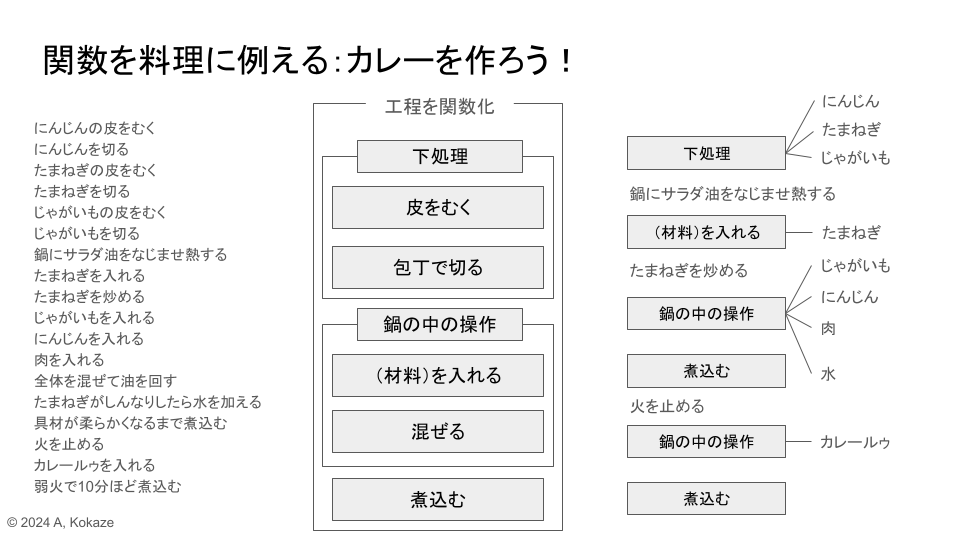

関数はdefで定義します。Geminiが手伝ってくれるので、まずは問題から文法を学んでいきましょう。

## 【問題4-1】 数値を引数として取り、その数値が偶数なら "偶数です"、奇数なら "奇数です" を返す関数 even_or_odd を定義してください。

### 解答と解説

In [29]:
# prompt: 数値を引数として取り、その数値が偶数なら "偶数です"、奇数なら "奇数です" を返す関数 even_or_odd を定義してください。

def even_or_odd(number):
  if number % 2 == 0:
    return "偶数です"
  else:
    return "奇数です"

0は偶数です
1は奇数です
2は偶数です
3は奇数です
4は偶数です
5は奇数です
6は偶数です
7は奇数です
8は偶数です
9は奇数です


関数を定義するには、**def**から始まって**return**で終わる一連の流れを書いていきます。

```
def 関数名(引数)：
  処理内容
  return 戻り値
```
- **関数名**は、その関数が何をするのかがわかるような名前を付けましょう。
- **引数**は、関数の中で使用する値です。複数の引数を取ることができます。ただし、関数を実行する際には、その引数に対応する値を()の中に入れなければなりません。
- **return**は、関数の処理が完了した後に、関数から戻り値として返す値を指定します。複数の値を返したい場合は、それらの値をタプル（複数の値をカンマで区切るデータ構造、順序あり）として返すことができます。

## 【問題4-1】 even_or_oddを使って、入力した数値が奇数か偶数かを判断してください。

### 解答と解説

In [30]:
# prompt: even_or_oddを使って、入力した数値が奇数か偶数かを判断してください。

input_number = int(input("数値を入力してください: "))
print(even_or_odd(input_number))

数値を入力してください: 295702368206
偶数です


関数を実行するには、


```
関数名(引数)
```
という法則で書きます。戻り値が複数ある場合には、以下のようになります。


```
戻り値1, 戻り値2 = 関数名（引数）
```



今回のコードでは、まずinputで数値を入力させ、それを整数型に変換したものをinput_numberという変数に格納しています。

そしてその値をeven_or_oddの引数として用い、戻り値を出力しています。